## Establishing a readout protocol for radiochromic silicone-based 3D dosimeters



In this notebook, we will see examples of the data analysis of the radiochromic silicone based samples. The dosimeters were readout for 6 consecutive days.



In [1]:
# defining a class to store the measurements

class Dos_class():
    dos_list = []
    def __init__(self, dos_number=None, OCT=None, irrad_days=None, readout_days=None, side=None):
        self.dos_list.append(self)
        self.OCT = OCT
        self.irrad_days = irrad_days
        self.readout_days = readout_days
        self.side = side
        self.dos_number = dos_number

    def __str__(self):
        return "Dosimeter number {}, readout day {}".format(self.dos_number, self.readout_days)

    #def __eq__(self, other):
    #    return self.dos_number == other.dos_number and self.suit == other.suit

    def __lt__(self, other):
        return self.rank < other.rank

In [2]:
import matplotlib.pyplot as plt
import scipy as sc
import os, os.path
from scipy.io import savemat
import numpy as np

# data import
d = 'data/reconstructions'
subfolders = [os.path.join(d, o) for o in os.listdir(d) 
                    if os.path.isdir(os.path.join(d,o))]

subfolders = [i for i in subfolders if i.endswith('_crop_aligned_aligned_crop')]

for i in subfolders:
    for name in os.listdir(i):
        if name.endswith("mat"):
            
            mat = sc.io.loadmat(i + str('/') + name)
            OCT = np.array(mat['OCT'])

            if name[6] == 'b':
                dos_side = 'bottom'
            elif name[6] == 't':
                dos_side = 'top'
            
            dosimeter = Dos_class()
            dosimeter.dos_number = name[4]
            dosimeter.OCT = np.array(mat['OCT'])
            dosimeter.readout_days = name[-5]
            dosimeter.side = dos_side

# checking that all the files were imported
print([str(dosimeter) for dosimeter in Dos_class.dos_list])


['Dosimeter number 3, readout day 2', 'Dosimeter number 4, readout day 6', 'Dosimeter number 1, readout day 1', 'Dosimeter number 5, readout day 5', 'Dosimeter number 1, readout day 5', 'Dosimeter number 1, readout day 6', 'Dosimeter number 2, readout day 1', 'Dosimeter number 1, readout day 2', 'Dosimeter number 4, readout day 3', 'Dosimeter number 6, readout day 1', 'Dosimeter number 3, readout day 4', 'Dosimeter number 2, readout day 2', 'Dosimeter number 3, readout day 1', 'Dosimeter number 3, readout day 2', 'Dosimeter number 6, readout day 5', 'Dosimeter number 1, readout day 6', 'Dosimeter number 4, readout day 5', 'Dosimeter number 6, readout day 2', 'Dosimeter number 6, readout day 3', 'Dosimeter number 4, readout day 2', 'Dosimeter number 6, readout day 2', 'Dosimeter number 4, readout day 5', 'Dosimeter number 2, readout day 6', 'Dosimeter number 5, readout day 3', 'Dosimeter number 5, readout day 5', 'Dosimeter number 5, readout day 2', 'Dosimeter number 5, readout day 2', 

We will first plot cross sections of different dosimeters, different days, etc:

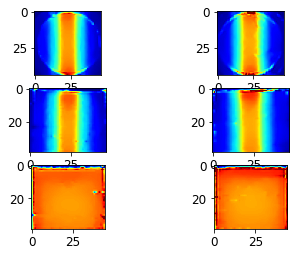

In [3]:
%matplotlib inline


plt.style.use('seaborn-dark-palette')
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(3, 2)

for dosimeter in Dos_class.dos_list:
    if int(dosimeter.dos_number) == 1:
        if int(dosimeter.readout_days) == 1:
            if dosimeter.side == 'bottom':
                im1 = ax[0, 0].imshow(dosimeter.OCT[int(dosimeter.OCT.shape[0] / 2), :, :], cmap='jet', vmin=0, vmax=0.4)
                im2 = ax[1, 0].imshow(dosimeter.OCT[:, int(dosimeter.OCT.shape[2] / 2), :], cmap='jet', vmin=0, vmax=0.4)
                im3 = ax[2, 0].imshow(dosimeter.OCT[:, :, int(dosimeter.OCT.shape[2] / 2)], cmap='jet', vmin=0, vmax=0.4)

            if dosimeter.side == 'top':
                im4 = ax[0, 1].imshow(dosimeter.OCT[int(dosimeter.OCT.shape[0] / 2), :, :], cmap='jet', vmin=0, vmax=0.4)
                im5 = ax[1, 1].imshow(dosimeter.OCT[:, int(dosimeter.OCT.shape[2] / 2), :], cmap='jet', vmin=0, vmax=0.4)
                im6 = ax[2, 1].imshow(dosimeter.OCT[:, :, int(dosimeter.OCT.shape[2] / 2)], cmap='jet', vmin=0, vmax=0.4)
plt.show()


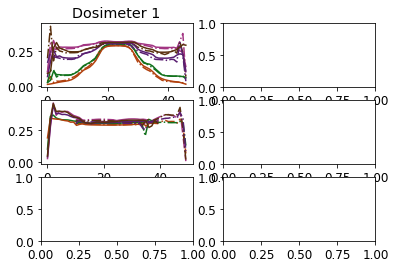

In [6]:
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn-dark-palette')
plt.rcParams.update({'font.size': 12})
c_string = sns.color_palette("dark", 7)
fig, ax = plt.subplots(3, 2)
for dosimeter in Dos_class.dos_list:
    if int(dosimeter.dos_number) == 2:
        x = int(dosimeter.OCT.shape[0] / 2)
        y = int(dosimeter.OCT.shape[1] / 2)
        z = int(dosimeter.OCT.shape[2] / 2)
        n = 2
        dos_lat_1 = np.mean(dosimeter.OCT[x, y-n:y+n, :], axis=0)
        dos_depth = np.mean(dosimeter.OCT[:, y-n:y+n, z], axis=1)
        dos_lat_2 = np.mean(dosimeter.OCT[x, :, z-n:z+n], axis=1)

        x_top = np.linspace(0, len(dos_depth), len(dos_depth))
        x_bottom = np.linspace(10, len(dos_depth)+10, len(dos_depth))

        if dosimeter.side == 'bottom':
            ax[0, 0].plot(np.flip(dos_lat_1), label=dosimeter.readout_days, linestyle='-.',
                       color=c_string[int(dosimeter.readout_days)])
            ax[1, 0].plot(x_bottom, np.flip(dos_depth), linestyle='-.', color=c_string[int(dosimeter.readout_days)])
        else:
            ax[0, 0].plot(dos_lat_1, color=c_string[int(dosimeter.readout_days)])
            ax[1, 0].plot(x_top, dos_depth, color=c_string[int(dosimeter.readout_days)])
        #ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax[0, 0].title.set_text('Dosimeter 1')


        #ax[2].plot(dos_depth)
plt.show()

 Now we can plot the change in background color of the dosimeter.


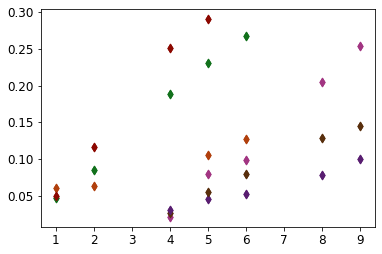

In [12]:
%matplotlib inline

plt.style.use('seaborn-dark-palette')
plt.rcParams.update({'font.size': 12})
c_string = sns.color_palette("dark", 7)
fig, ax = plt.subplots(1, 1)
m = 2

signal_list = np.zeros(6, 2, 6)
for dosimeter in Dos_class.dos_list:
    if dosimeter.side == 'top':
        continue
    dos_background = np.mean(np.mean(dosimeter.OCT[x, y-n:y+n, 7:10], axis=0))
    dos_signal = np.mean(np.mean(dosimeter.OCT[x, y-n:y+n, 21:25], axis=0))
    if int(dosimeter.dos_number) == 1 or \
            int(dosimeter.dos_number) == 2 or int(dosimeter.dos_number) == 3:
        day_n = int(dosimeter.readout_days)
    else:
        day_n = int(dosimeter.readout_days) + 3

    plt.scatter(day_n, dos_background,
                color=c_string[int(dosimeter.dos_number)], marker='d',
                label = dosimeter.dos_number)
plt.savefig('plots/bg_signal_ratio.png', dpi=400)
plt.show()


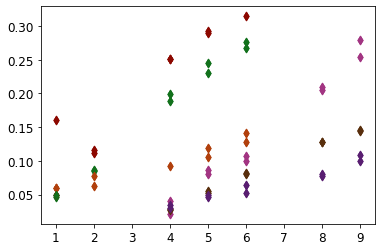

In [66]:
%matplotlib inline

plt.style.use('seaborn-dark-palette')
plt.rcParams.update({'font.size': 12})
c_string = sns.color_palette("dark", 7)
fig, ax = plt.subplots(1, 1)
m = 2

for dosimeter in Dos_class.dos_list:

    dos_background = np.mean(np.mean(dosimeter.OCT[x, y-n:y+n, 7:10], axis=0))
    dos_signal = np.mean(np.mean(dosimeter.OCT[x, y-n:y+n, 21:25], axis=0))
    if dosimeter.side == 'top':
        i = 0
    else:
        i = 1

    if int(dosimeter.dos_number) == 1 or \
            int(dosimeter.dos_number) == 2 or int(dosimeter.dos_number) == 3:
        day_n = int(dosimeter.readout_days)
    else:
        day_n = int(dosimeter.readout_days) + 3

    plt.scatter(day_n, dos_background,
                color=c_string[int(dosimeter.dos_number)], marker='d',
                label = dosimeter.dos_number)
plt.savefig('plots/bg_signal_ratio.png', dpi=400)
plt.show()

In [137]:

signal_list = np.zeros(shape=(6, 2, 6)) # dosimeter number, side, day
background_list = np.zeros(shape=(6, 2, 6))
signal_list_error = np.zeros(shape=(6, 2, 6))
background_list_error = np.zeros(shape=(6, 2, 6))

n = 2
for dosimeter in Dos_class.dos_list:

    dos_background = np.mean(np.mean(dosimeter.OCT[x, y-n:y+n, 41:45], axis=0))
    dos_signal = np.mean(np.mean(dosimeter.OCT[x, y-n:y+n, 21:25], axis=0))

    dos_signal_error = np.std(np.std(dosimeter.OCT[x, y-n:y+n, 41:45], axis=0))
    dos_background_error = np.std(np.mean(dosimeter.OCT[x, y-n:y+n, 21:25], axis=0))

    if dosimeter.side == 'top':
        i = 0
    else:
        i = 1
    signal_list[int(dosimeter.dos_number)-1,
                i, int(dosimeter.readout_days)-1] = dos_signal
    background_list[int(dosimeter.dos_number)-1,
                i, int(dosimeter.readout_days)-1] = dos_background
    signal_list_error[int(dosimeter.dos_number)-1,
                i, int(dosimeter.readout_days)-1] = dos_signal_error
    background_list_error[int(dosimeter.dos_number)-1,
                i, int(dosimeter.readout_days)-1] = dos_background_error

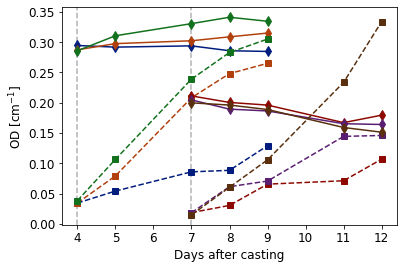

In [140]:
plt.style.use('seaborn-dark-palette')
plt.rcParams.update({'font.size': 12})
c_string = sns.color_palette("dark", 7)
fig, ax = plt.subplots(1, 1)

signal = np.zeros(6)

for i in range(0, 6):
    dosimeter_signal = np.zeros(6)
    dosimeter_background = np.zeros(6)
    days_list = np.zeros(6)
    m = 0
    for j in range(0, 6):

        if signal_list[i, 0, j] == 0 and signal_list[i, 1, j] == 0:
            continue
        elif signal_list[i, 0, j] == 0:
            signal = signal_list[i, 1, j]
            background = background_list[i, 1, j]
            day = j + 1
        elif signal_list[i, 1, j] == 0:
            signal = signal_list[i, 0, j]
            background = background_list[i, 0, j]
            day = j + 1
        elif i == 2 and j == 0:
            signal = signal_list[i, 1, j]
            background = background_list[i, 1, j]
            day = j + 1
        else:
            signal = (signal_list[i, 0, j] + signal_list[i, 1, j])/2
            background = (background_list[i, 0, j] + background_list[i, 1, j])/2
            day = j + 1

        if i > 2:
                day = day + 3

        days_list[j] = day
        dosimeter_signal[j] = signal
        dosimeter_background[j] = background

    if i < 3:
        dosimeter_signal = np.delete(dosimeter_signal, 2)
        dosimeter_background = np.delete(dosimeter_background, 2)
        days_list = np.delete(days_list, 2)
    else:
        dosimeter_signal = np.delete(dosimeter_signal, 3)
        dosimeter_background = np.delete(dosimeter_background, 3)
        days_list = np.delete(days_list, 3)

    days_list = days_list + 3
    plt.errorbar(days_list, dosimeter_signal, color=c_string[i], marker='d', markersize=7, linestyle='-')
    plt.errorbar(days_list, dosimeter_background, color=c_string[i], marker='s', markersize=6, linestyle='--')

plt.axvline(x=4, color='gray', alpha=0.6, linestyle='--')
plt.axvline(x=7, color='gray', alpha=0.6, linestyle='--')
plt.xlabel('Days after casting')
plt.ylabel('OD [cm${}^{-1}$]')
plt.show()